In [ ]:
from tensorflow import keras
import os

## CNN 모델을 이용한 가위-바위-보 분류 데이터 셋 분류

### Step 1. Input tensor 와 Target tensor 준비(훈련데이터)

(1) 가위-바위-보 데이터셋 다운로드

In [ ]:
url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip'

path_to_zip = keras.utils.get_file('rps.zip',
                                   origin=url,
                                   extract=True,
                                   cache_dir='/content')

In [ ]:
url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip'

path_to_zip = keras.utils.get_file('rps_test.zip',
                                   origin=url,
                                   extract=True,
                                   cache_dir='/content')

(2) ImageDataGenerator를 이용해 이미지 파일을 load 하기 위한 경로 지정

In [ ]:
train_dir = '/content/datasets/rps'
test_dir = '/content/datasets/rps-test-set'

(3) ImageDataGenerator 객체 생성  
* 객체 생성 시 rescale 인자를 이용하여 텐서 내 원소의 범위를 [0 ~ 255] => [0 ~ 1] 로 ReScaling 진행

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255., validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255.)

* .flow_from_directory() 메서드를 이용하여 학습데이터와 검증데이터를 위한 DirectoryIterator 객체 생성

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, shuffle=True, class_mode='categorical', subset='training', seed=7)

validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, shuffle=True, class_mode='categorical', subset='validation', seed=7)

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=20, class_mode='categorical', subset='training')

Found 2016 images belonging to 3 classes.
Found 504 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


### Step2. CNN 모델 디자인 및 학습 정보 설정


(1) 모델을 생성하여 return 할 수 있는 build_model 함수 정의
  * CNN 모델 디자인
  * CNN 모델의 summary 정보 출력
  * 모델의 학습 정보 설정

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#flatten
model.add(layers.Flatten())

#classification_module
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras.utils import plot_model

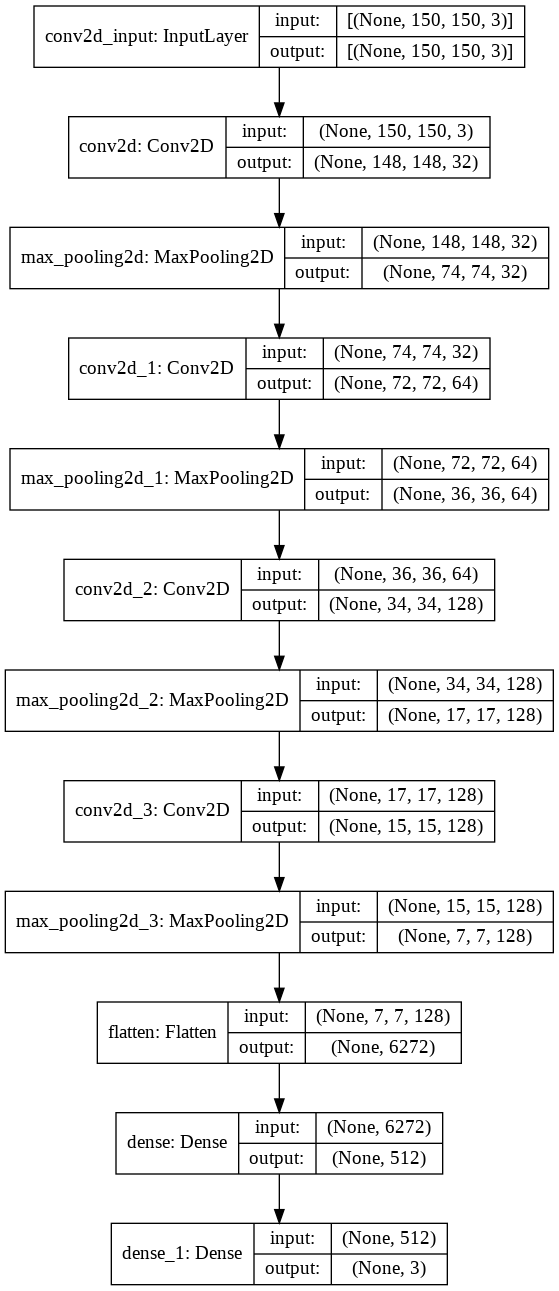

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer='rmsprop', metrics=['accuracy'])

### Step 3. 모델에 데이터 generator 연결 후 학습 
  * model.fit() 이용하여 데이터 연결 및 학습
  * 학습 과정은 history 변수에 저장

In [ ]:
model.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator), validation_data=validation_generator, validation_steps=len(validation_generator))

Epoch 1/10
101/101 [==============================] - 12s 92ms/step - loss: 0.6336 - accuracy: 0.7574 - val_loss: 0.2933 - val_accuracy: 0.8591
Epoch 2/10
101/101 [==============================] - 9s 86ms/step - loss: 0.1211 - accuracy: 0.9906 - val_loss: 0.6035 - val_accuracy: 0.8333
Epoch 3/10
101/101 [==============================] - 9s 87ms/step - loss: 0.0507 - accuracy: 0.9881 - val_loss: 1.4204 - val_accuracy: 0.7778
Epoch 4/10
101/101 [==============================] - 9s 87ms/step - loss: 0.0613 - accuracy: 0.9891 - val_loss: 0.5747 - val_accuracy: 0.8710
Epoch 5/10
101/101 [==============================] - 9s 86ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 1.5859 - val_accuracy: 0.8571
Epoch 6/10
101/101 [==============================] - 9s 86ms/step - loss: 3.0568e-06 - accuracy: 1.0000 - val_loss: 2.0290 - val_accuracy: 0.8472
Epoch 7/10
101/101 [==============================] - 9s 88ms/step - loss: 1.0880e-08 - accuracy: 1.0000 - val_loss: 2.3522 - val_accurac

### Step 4. 테스트 데이터 셋을 통한 모델의 성능 평가

In [ ]:
loss, accuracy = model.evaluate(test_generator)

19/19 [==============================] - 1s 76ms/step - loss: 2.9850 - accuracy: 0.8495
